<a href="https://colab.research.google.com/github/nikita-0209/tesseract-ocr/blob/master/Binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline


# Niblack and Sauvola Thresholding


Niblack and Sauvola thresholds are local thresholding techniques that are
useful for images where the background is not uniform, especially for text
recognition [1]_, [2]_. Instead of calculating a single global threshold for
the entire image, several thresholds are calculated for every pixel by using
specific formulae that take into account the mean and standard deviation of the
local neighborhood (defined by a window centered around the pixel).

Here, we binarize an image using these algorithms compare it to a common global
thresholding technique. Parameter `window_size` determines the size of the
window that contains the surrounding pixels.

.. [1] Niblack, W (1986), An introduction to Digital Image
       Processing, Prentice-Hall.
.. [2] J. Sauvola and M. Pietikainen, "Adaptive document image
       binarization," Pattern Recognition 33(2),
       pp. 225-236, 2000.
       :DOI:`10.1016/S0031-3203(99)00055-2`


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"1cvmCFhJyX0dcaeZryZ90-4eg-WPNkSzc"})   # replace the id with id of file you want to access
downloaded.GetContentFile('price_tag1.jpg')        # replace the file name with your file

In [0]:
import skimage.io
# read image
original = skimage.io.imread(fname="price_tag1.jpg")

In [0]:
import skimage.io
from skimage.color import rgb2gray

original = skimage.io.imread(fname="price_tag1.jpg")
grayscale = rgb2gray(original)

In [0]:
# image=page()
image=grayscale

In [0]:
image.shape

(191, 384)

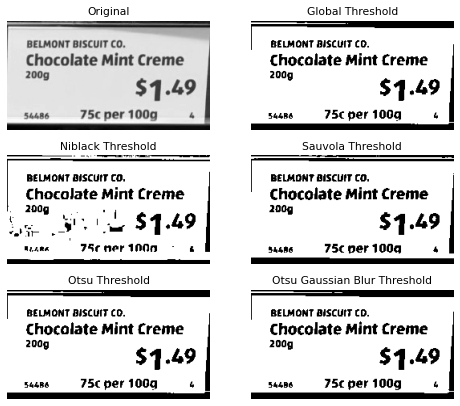

In [0]:
import matplotlib
import matplotlib.pyplot as plt

from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)


matplotlib.rcParams['font.size'] = 9

binary_global = image > threshold_otsu(image)
blurred = skimage.filters.gaussian(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
thresh_otsu = threshold_otsu(image)#, window_size=window_size)
thresh_otsu_blur = threshold_otsu(blurred)
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_otsu = image > thresh_otsu
binary_otsu_blur = image > thresh_otsu_blur 

plt.figure(figsize=(8, 7))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.title('Otsu Threshold')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(binary_otsu_blur, cmap=plt.cm.gray)
plt.title('Otsu Gaussian Blur Threshold')
plt.axis('off')

plt.show()

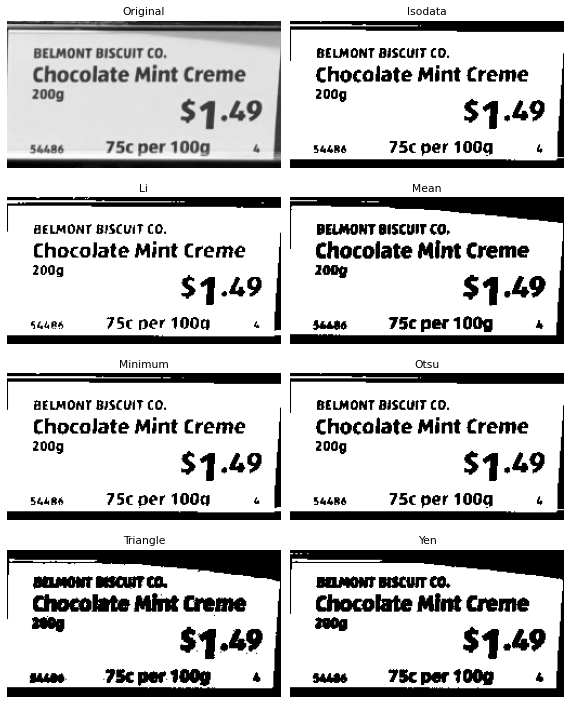

In [0]:
from skimage.filters import try_all_threshold

# img = data.page()

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(image, figsize=(8, 10), verbose=False)
plt.show()

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"14orOQK5yC8uGyqGT-FmC0sGYBa6mBiZ3"})   # replace the id with id of file you want to access
downloaded.GetContentFile('price_tag10.jpg')        # replace the file name with your file

In [0]:
original = skimage.io.imread(fname="price_tag10.jpg")
grayscale = rgb2gray(original)
image=grayscale

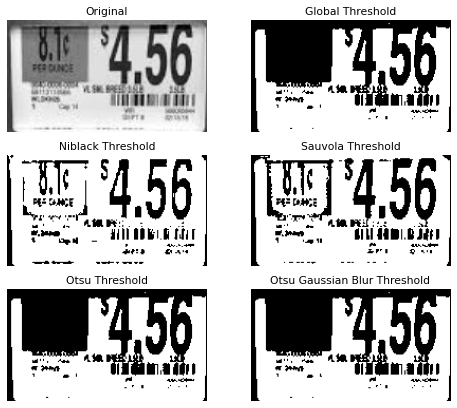

In [0]:
matplotlib.rcParams['font.size'] = 9

binary_global = image > threshold_otsu(image)
blurred = skimage.filters.gaussian(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
thresh_otsu = threshold_otsu(image)#, window_size=window_size)
thresh_otsu_blur = threshold_otsu(blurred)
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_otsu = image > thresh_otsu
binary_otsu_blur = image > thresh_otsu_blur 

plt.figure(figsize=(8, 7))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.title('Otsu Threshold')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(binary_otsu_blur, cmap=plt.cm.gray)
plt.title('Otsu Gaussian Blur Threshold')
plt.axis('off')

plt.show()

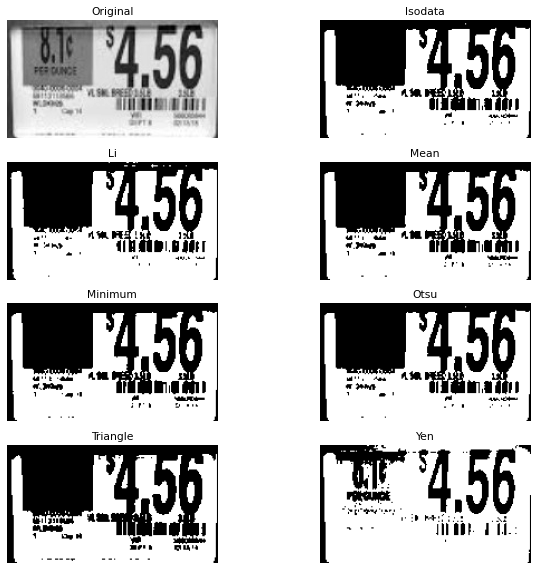

In [0]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"11JMCtx7ivNiFdtQG2t5rfENhEfzu8jKU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('price_tag11.jpg')        # replace the file name with your file
original = skimage.io.imread(fname="price_tag11.jpg")
grayscale = rgb2gray(original)
image=grayscale

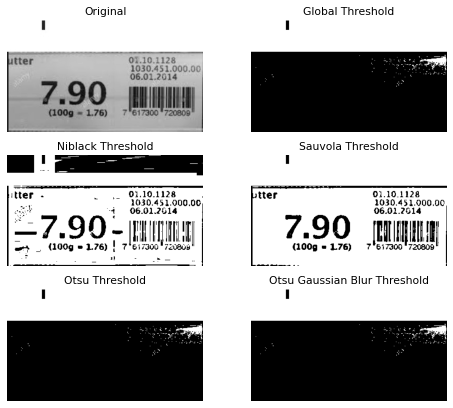

In [0]:
matplotlib.rcParams['font.size'] = 9

binary_global = image > threshold_otsu(image)
blurred = skimage.filters.gaussian(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
thresh_otsu = threshold_otsu(image)#, window_size=window_size)
thresh_otsu_blur = threshold_otsu(blurred)
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_otsu = image > thresh_otsu
binary_otsu_blur = image > thresh_otsu_blur 

plt.figure(figsize=(8, 7))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.title('Otsu Threshold')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(binary_otsu_blur, cmap=plt.cm.gray)
plt.title('Otsu Gaussian Blur Threshold')
plt.axis('off')

plt.show()

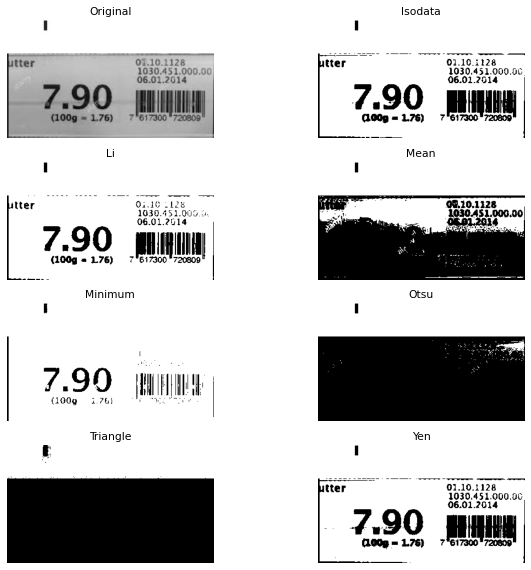

In [0]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"1Z8aJDfEt__1fnZisxK2mHAcOWh5WkJ6c"})   # replace the id with id of file you want to access
downloaded.GetContentFile('price_tag2.jpg')        # replace the file name with your file
original = skimage.io.imread(fname="price_tag2.jpg")
grayscale = rgb2gray(original)
image=grayscale

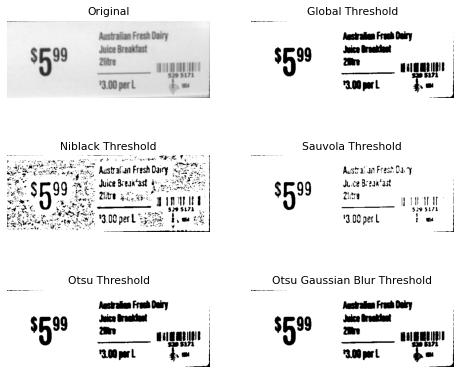

In [0]:
matplotlib.rcParams['font.size'] = 9

binary_global = image > threshold_otsu(image)
blurred = skimage.filters.gaussian(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
thresh_otsu = threshold_otsu(image)#, window_size=window_size)
thresh_otsu_blur = threshold_otsu(blurred)
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_otsu = image > thresh_otsu
binary_otsu_blur = image > thresh_otsu_blur 

plt.figure(figsize=(8, 7))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.title('Otsu Threshold')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(binary_otsu_blur, cmap=plt.cm.gray)
plt.title('Otsu Gaussian Blur Threshold')
plt.axis('off')

plt.show()

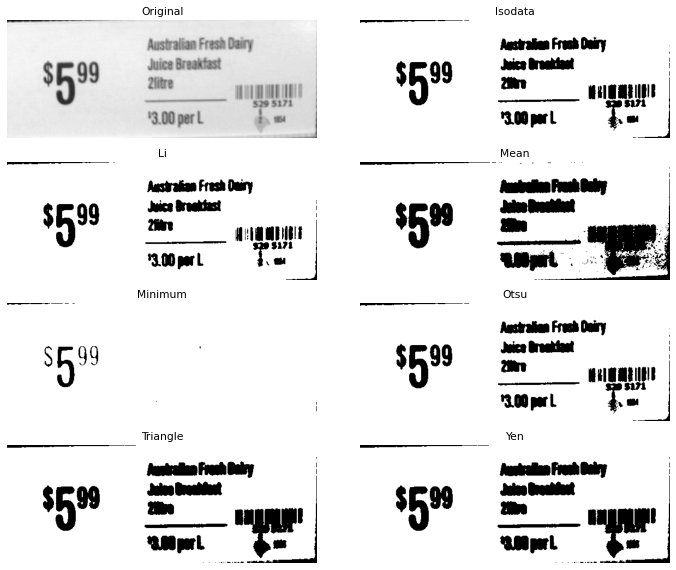

In [0]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"1MWKtGbznOqQw1BrdJsb7o1NgQNI4PE1u"})   # replace the id with id of file you want to access
downloaded.GetContentFile('same_size_text2.jpg')        # replace the file name with your file
original = skimage.io.imread(fname="same_size_text2.jpg")
grayscale = rgb2gray(original)
image=grayscale

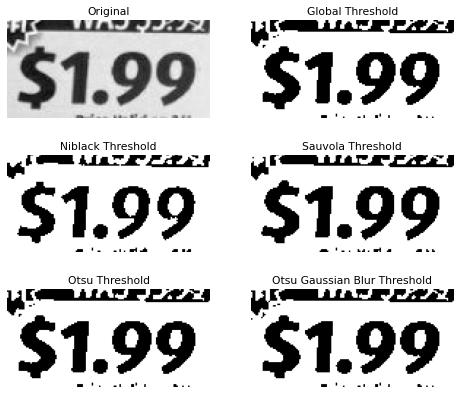

In [0]:
matplotlib.rcParams['font.size'] = 9

binary_global = image > threshold_otsu(image)
blurred = skimage.filters.gaussian(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
thresh_otsu = threshold_otsu(image)#, window_size=window_size)
thresh_otsu_blur = threshold_otsu(blurred)
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_otsu = image > thresh_otsu
binary_otsu_blur = image > thresh_otsu_blur 

plt.figure(figsize=(8, 7))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.title('Otsu Threshold')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(binary_otsu_blur, cmap=plt.cm.gray)
plt.title('Otsu Gaussian Blur Threshold')
plt.axis('off')

plt.show()

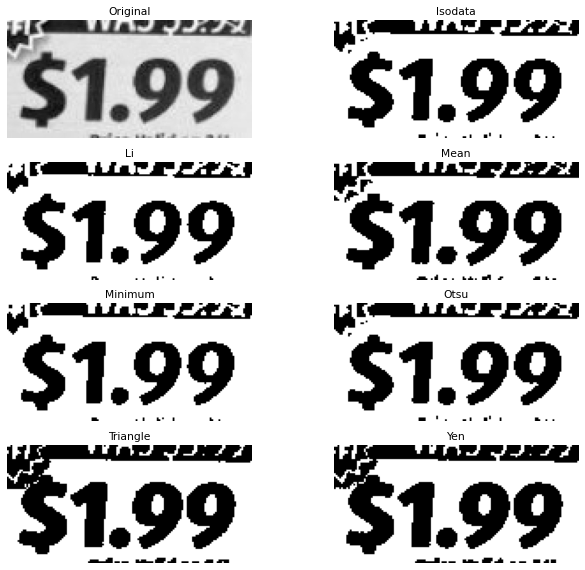

In [0]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"1YFSp7lelNMygVkPIsYWESKNrbsO43O-z"})   # replace the id with id of file you want to access
downloaded.GetContentFile('price_tag4.jpg')        # replace the file name with your file
original = skimage.io.imread(fname="price_tag4.jpg")
grayscale = rgb2gray(original)
image=grayscale

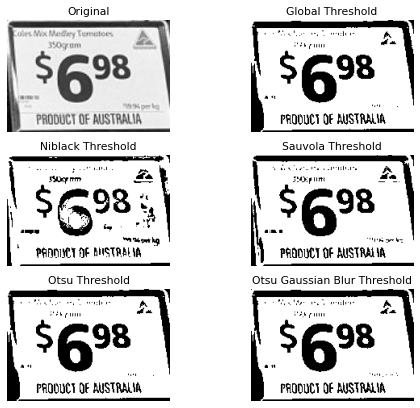

In [0]:
matplotlib.rcParams['font.size'] = 9

binary_global = image > threshold_otsu(image)
blurred = skimage.filters.gaussian(image)

window_size = 25
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8)
thresh_sauvola = threshold_sauvola(image, window_size=window_size)
thresh_otsu = threshold_otsu(image)#, window_size=window_size)
thresh_otsu_blur = threshold_otsu(blurred)
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola
binary_otsu = image > thresh_otsu
binary_otsu_blur = image > thresh_otsu_blur 

plt.figure(figsize=(8, 7))
plt.subplot(3, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Global Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(binary_otsu, cmap=plt.cm.gray)
plt.title('Otsu Threshold')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(binary_otsu_blur, cmap=plt.cm.gray)
plt.title('Otsu Gaussian Blur Threshold')
plt.axis('off')

plt.show()

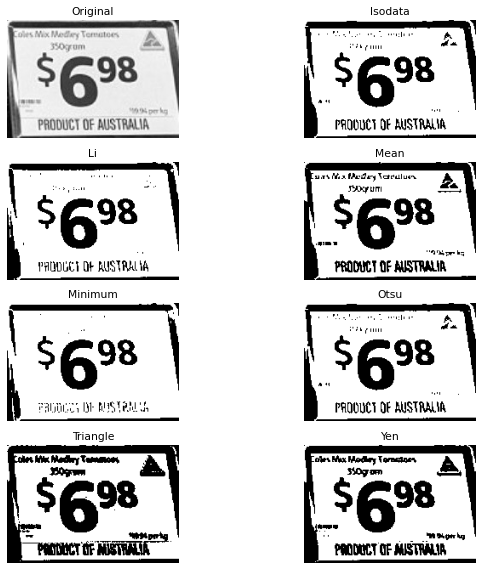

In [0]:
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()